Visualization for **Linear Regression**:

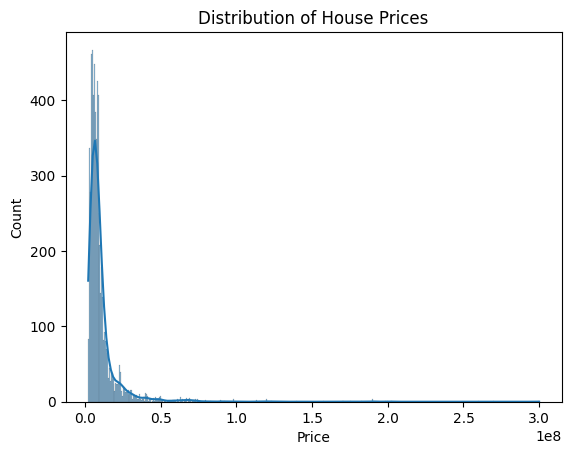

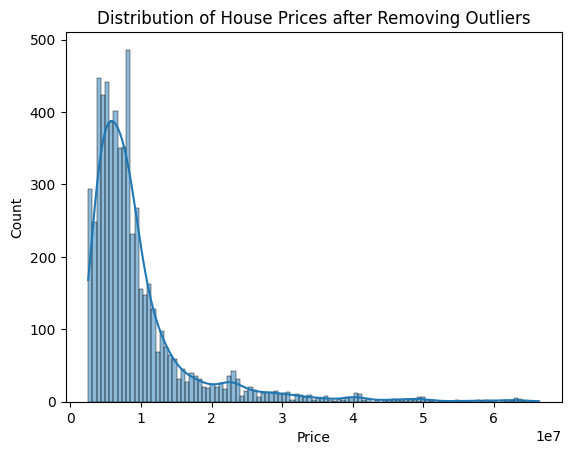

In [33]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load Data
file_path = "BangaloreHousing.csv"
data = pd.read_csv(file_path)

# Visualize the distribution of the target variable
sns.histplot(data['Price'], kde=True)
plt.title('Distribution of House Prices')
plt.show()

# Remove extreme outliers in 'Price'
q_low = data['Price'].quantile(0.01)
q_high = data['Price'].quantile(0.99)
data_filtered = data[(data['Price'] > q_low) & (data['Price'] < q_high)]

# Check distribution again
sns.histplot(data_filtered['Price'], kde=True)
plt.title('Distribution of House Prices after Removing Outliers')
plt.show()


In [34]:
# Selecting a subset of relevant features
selected_features = ['Area', 'No. of Bedrooms', 'Gymnasium', 'SwimmingPool', 'CarParking']
X = data_filtered[selected_features]
y = data_filtered['Price']


Mean Squared Error: 53129290711423.82
R^2 Score: 0.16210223482442054


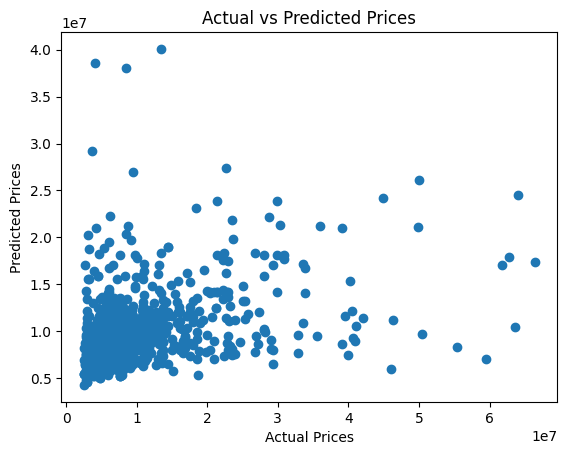

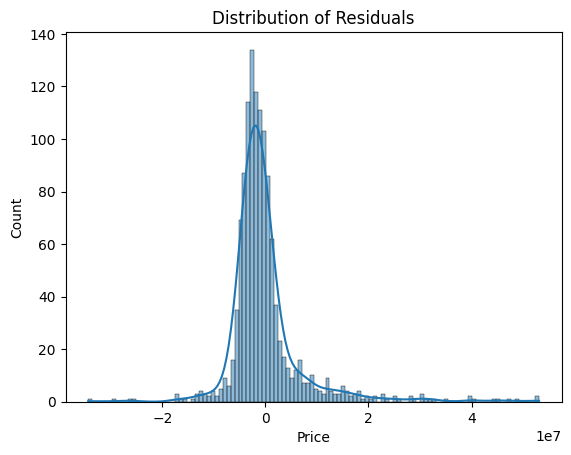

                  Coefficient
Area             3.890355e+06
No. of Bedrooms -4.012127e+05
Gymnasium       -9.667661e+06
SwimmingPool     7.498230e+06
CarParking       2.334543e+06
9675534.023340464


In [35]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Visualization
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Plotting residuals
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.show()

# Displaying coefficients
coeff_df = pd.DataFrame(model.coef_, selected_features, columns=['Coefficient'])
print(coeff_df)

# Displaying intercept
print(model.intercept_)


In [36]:
#Checking for Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)



           feature          VIF
0             Area    11.491957
1  No. of Bedrooms    16.444914
2        Gymnasium  1775.316516
3     SwimmingPool  1714.326950
4       CarParking   637.074327


Visualization for **Improved** Linear Regression with **Polynomial Features**:

In [37]:
#Removing High VIF Features


from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF and remove high VIF features
def calculate_vif(X, threshold=10):
    while True:
        vif_data = pd.DataFrame()
        vif_data["feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

        max_vif = vif_data["VIF"].max()
        if max_vif > threshold:
            feature_to_remove = vif_data[vif_data["VIF"] == max_vif]["feature"].values[0]
            X = X.drop(columns=[feature_to_remove])
        else:
            break
    return X

# Load Data
file_path = "BangaloreHousing.csv"
data = pd.read_csv(file_path)

# Feature Selection
selected_features = ['Area', 'No. of Bedrooms', 'Gymnasium', 'SwimmingPool', 'CarParking']
X = data[selected_features]
y = data['Price']

# Remove Multicollinearity
X = calculate_vif(X)
print(X.head())


   Area  CarParking
0  3340           0
1  1045           1
2  1179           0
3  1675           0
4  1670           1


In [38]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [39]:
#Recursive Feature Elimination (RFE)

from sklearn.feature_selection import RFE

# Initialize linear regression model
model = LinearRegression()

# Use RFE to select top features
selector = RFE(model, n_features_to_select=3, step=1)
selector = selector.fit(X_scaled, y)
selected_features = X.columns[selector.support_]

# Use only selected features
X_selected = X[selected_features]


In [40]:
#Polynomial Features and Linear Regression

from sklearn.preprocessing import PolynomialFeatures

# Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_selected)


Mean Squared Error: 217699934987106.3
R^2 Score: 0.1888885777554632


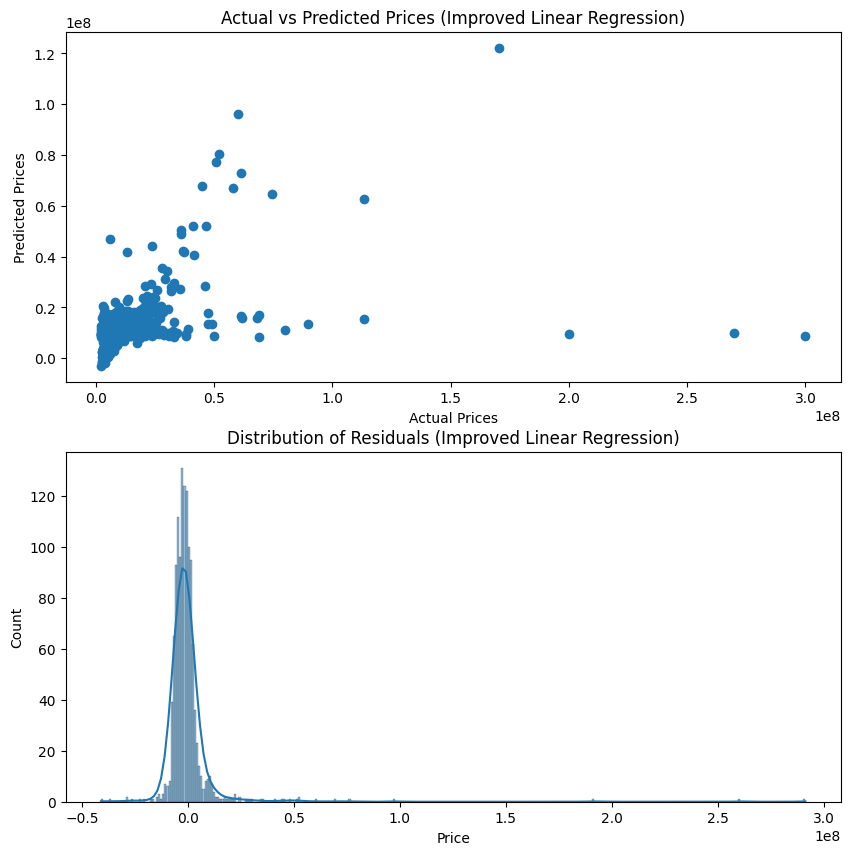

In [41]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Visualization
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Improved Linear Regression)')

plt.subplot(2, 1, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals (Improved Linear Regression)')
plt.show()


Visualization for **Ridge Regression**:

Ridge regression is a linear regression that adds a coefficient penalty term in order not to overfit. It circumvents a linear regression model by shrinking the coefficients to penalize them for increasing their magnitude in an attempt to generally improve the generalization and performance of the model.

In [42]:
# Remove outliers from features
for feature in selected_features:
    q_low = data[feature].quantile(0.01)
    q_high = data[feature].quantile(0.99)
    data = data[(data[feature] > q_low) & (data[feature] < q_high)]

# Update the selected features after removing outliers
X = data[selected_features]
y = data['Price']


Mean Squared Error: 12749405839033.646
R^2 Score: 0.7730729105791543
Cross-Validated R^2 Scores: [0.74655157 0.78168447 0.58890756 0.75276638 0.84965235]
Mean R^2 Score: 0.7439124674143247


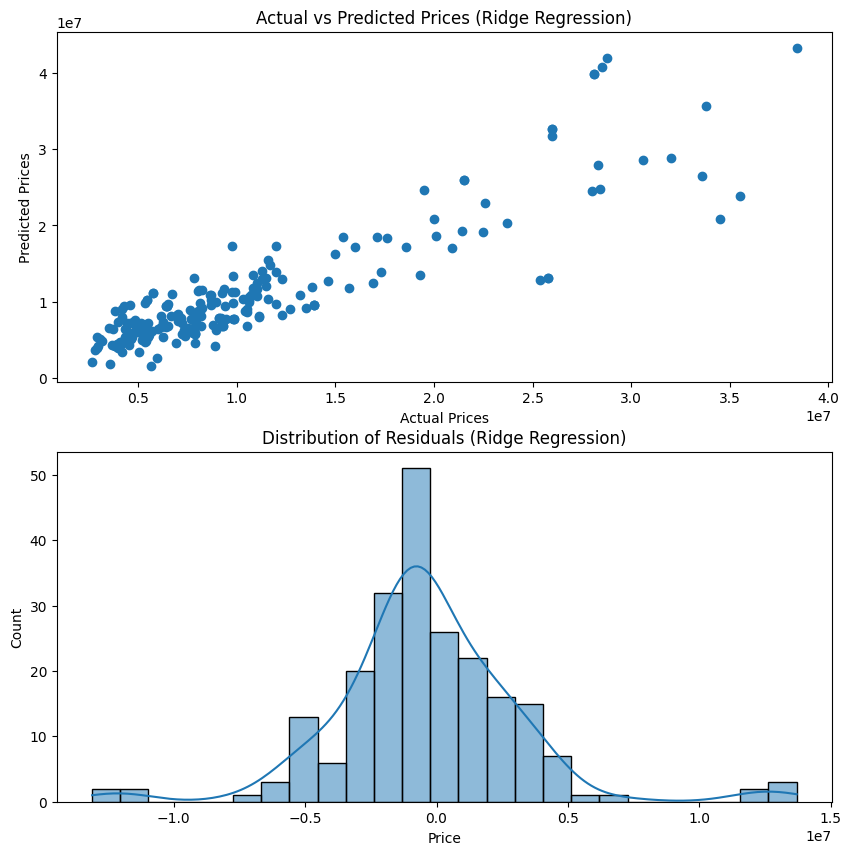

In [43]:
#Ridge Regression

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Add Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Ridge Regression Model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Evaluate the model
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Cross-Validation
cv_scores = cross_val_score(ridge, X_scaled, y, cv=5, scoring='r2')
print(f'Cross-Validated R^2 Scores: {cv_scores}')
print(f'Mean R^2 Score: {np.mean(cv_scores)}')

# Visualization
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Ridge Regression)')

plt.subplot(2, 1, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals (Ridge Regression)')
plt.show()


Refer **ReadMe** for More Details